Import libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [11]:
dataset = pd.read_csv('heart_failure_1.csv')


The first step for exploratory data analysis is understanding the data you are working with. Most often the dataset you will be provided with will have a description of the columns in the table. Sometimes you will have a pretty clear understanding of what these variables mean (e.g. age, price of something, etc.). However sometimes this is not the case. Like in the present case, where we have to work with some medical measurements that we are not familiar with. We might not be doctors, but there is always Google. So first figure out what each of your variables mean, what values they may take 
•	Maximum and minimum values
•	Normal ranges
•	How are they measured- integers versus decimal values, etc. This will allow you to make some expectations about what you should be seeing in your exploration and what appears to be an anomaly that you should deal with. 

For example you might find some values that are obvious errors (e.g. remember the Glucose levels of zero in our previous dataset?), or some decimal values where measurement scale of the variable should be in integers (e.g. Platelets and Age in the current dataset that should be integers, but contain decimal values), etc. Then decide how to deal with them (exclude observations all together (not the preferred option especially with smaller datasets, but sometimes it can be the right option), substitute by mean, by median, by mode (for nominal variables)).


***So let's start by printing out the names of the columns of our dataset and then figure out the meaning of each of our variables.***

In [12]:
dataset.columns.tolist()

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time',
 'CHF']

This is the description of variables that comes with the dataset:

**creatinine_phosphokinase** - Level of the CPK enzyme in the blood (U/L)

**ejection_fraction** - Percentage of blood leaving the heart at each contraction (percentage)

**platelets** - Platelets in the blood (/mcL)

**serum_creatinine** - Level of serum creatinine in the blood (mg/dL)

**serum_sodium** - Level of serum sodium in the blood (mEq/L)

**time** - number of days since last visit to the doctor (days)

**CHF** - categorical variable, takes value of 0 if patient is not suffering from congestive heart failure and 1 otherwise



All of these variables are some metrics of one's physical well-being. It appears that all of them could play a role in predicting CHF, or at least have some type of correlation with CFH.

These descriptions unfortunately are not enough for those outside of medical professions to make any kind of expectations as of what we should expect to see in their distributions, what values are too large or too small, what correlations we could see between these variables, etc. So further investigation is necessary. 

**This is what I found on the internet:**

**creatinine_phosphokinase** - Normally, creatine phosphokinase occurs in heart tissue, skeletal muscles, the brain, etc. However, upon muscular injury, there is leakage of CPK into the bloodstream. Thus, CPK is indicative of muscular damage. 

This makes one believe that higher levels of creatinine_phosphokinase could be correlated with CHF. 

Total CPK normal values: men - 39 – 308 U/L, women - 26 – 192 U/L

**ejection_fraction** - Here are the ranges I found:
55% to 70% - Normal
40% to 54% - Slightly below normal
35% to 39% - Moderately below normal
Less than 35% - Severely below normal

One would expect that ejection_fraction would be negatively correlated with CHF - i.e. those with CHF will have lower ejection rates.




**platelets** - While the connection between platelets and CHF is not so clear cut, too low count of platelets is associated with increased risk of hemorage, while too high levels with thrombotic episodes.

150,000 to 450,000 platelets per microliter of blood. Having more than 450,000 platelets is a condition called thrombocytosis; having less than 150,000 is known as thrombocytopenia.

The expectation is that those with platelets measurements that are not too high, nor too low will have a lower prevalence of CHF

**serum_creatinine** -  patients with heart failure (HF) experience small to moderate rise in serum creatinine (RSC), so one should expect a positive correlation between this variable and CHF.

men - 0.74 to 1.35 mg/dL 
women - 0.59 to 1.04 mg/dL 

**serum_sodium** - low levels of serum sodium is one of the most common biochemical disorders featured in heart failure patients, thus one should expect a negative correlation between this variable and CHF.

Normal range : 135 to 145 (mEq/L), anything below is considered a medical conditions called Hyponatremia. 

**time** - one would expect that those with fewer health problems would have longer periods since they have last visited the doctor. Thus a negative correlation between CHF and time is expected.

**To start exploring our data lets look at some of the statistics**

In [13]:
dataset.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,CHF
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870,0.32107
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208,0.46767
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000,0.00000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000,0.00000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000,0.00000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000,1.00000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000,1.00000


For now let's just check for some odd values, to make sure we have no measurement errors present. 

The only rather odd value that comes into focus is the maximum of creatinine_phosphokinase, which is way off the normal range. At this point one should check if such values are even possible, if not, we should consider removing such high values as these could be measurement errors. 

This is what I found by searching the internet: 
*The risk of renal failure increases above 5,000 to 6,000 IU/L. Interestingly, one series found that only patients with a peak CK greater than 20,000 IU/L failed to respond to diuresis and required dialysis. *

So that means that the person with  20,000 IU/L was alive, thus we cannot exclude the very high values observed in our dataset on the reason that these are measurement errors. 



**Let us further check the type of our data**

In [14]:
dataset.dtypes

age                         float64
creatinine_phosphokinase      int64
ejection_fraction             int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
time                          int64
CHF                           int64
dtype: object

There are two odd things one can notice here:

1) The variable Platelets is not an integer, although it should be

2) Age is also not an integer

**Let's print our dataset for further investigation**

In [15]:
pd.set_option('display.max_rows', dataset.shape[0]+1)
pd.set_option('display.max_columns', dataset.shape[0]+1)
print(dataset)

        age  creatinine_phosphokinase  ejection_fraction  platelets  \
0    75.000                       582                 20  265000.00   
1    55.000                      7861                 38  263358.03   
2    65.000                       146                 20  162000.00   
3    50.000                       111                 20  210000.00   
4    65.000                       160                 20  327000.00   
5    90.000                        47                 40  204000.00   
6    75.000                       246                 15  127000.00   
7    60.000                       315                 60  454000.00   
8    65.000                       157                 65  263358.03   
9    80.000                       123                 35  388000.00   
10   75.000                        81                 38  368000.00   
11   62.000                       231                 25  253000.00   
12   45.000                       981                 30  136000.00   
13   5

The variable has a number of times a non integer value repeated throughout the column: 263358.03 (first time in the 2nd position).

Age also has the value 60.667 in row 185 and 188.

Let us look once again at the table with statistics for our data. You can notice that both these values are very close to the means of the two variables. 

Platelets: value in the column - 263358.03; mean in table below -263358.029264

Age: value in the column - 60.667; mean in the table below - 60.833893

Looking at these numbers this is what I what most probably has happened: These two variables contained some missing values, these missing values were **zeros** not NaNs! Whoever worked with this dataset before us, must have substituted these zero values for Age and Platelets with their means. The substituted values are slightly different because their represent the averages with those zero values included in the calculations. This is why when the zero values for Age were substituted by 60.667, the mean in the table bellow grew to 60.833893. Although that is was only two values substituted for the variable age (check the printed dataset) the mean, which was initially incorrectly calculated! was shifted by almost 0.2 points to the right. 

This difference is not so visible in the case of Platelents, although there were more values that were substituted by the mean in the dataset, because the measuerement scale is so much larger.



One should not just trust the work done by someone they don't know and whose work quality they don't know, especially when you see sloppy execution like in this case (whoever substituted the zero values with the mean didn't bother to exclude the zero values from computations of the mean). 

So it is up to us to do it right.

In [16]:
dataset.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,CHF
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870,0.32107
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208,0.46767
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000,0.00000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000,0.00000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000,0.00000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000,1.00000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000,1.00000


To correct for this issue first substitute the non integer values of Age and Platelets with NaNs. 

In [17]:
dataset['age']=dataset['age'].replace(60.667, np.nan)
dataset['platelets']=dataset['platelets'].replace(263358.03, np.nan)


Second check the skewness of your two variables to decide whether you should substitute the missing values with means or meadians. (I am adding skewness to the description table to check once again the other statistics and how they changed).

In [18]:
stats_df=dataset.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']
stats_df.loc['skewness'] = dataset.skew()
stats_df.loc['kurtosis'] = dataset.kurt()
stats_df

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,CHF
count,297.000000,299.000000,299.000000,274.000000,299.000000,299.000000,299.000000,299.000000
mean,60.835017,581.839465,38.083612,263358.029197,1.393880,136.625418,130.260870,0.321070
std,11.934919,970.287881,11.834841,102184.371316,1.034510,4.412477,77.614208,0.467670
min,40.000000,23.000000,14.000000,25100.000000,0.500000,113.000000,4.000000,0.000000
25%,51.000000,116.500000,30.000000,205000.000000,0.900000,134.000000,73.000000,0.000000
50%,60.000000,250.000000,38.000000,253000.000000,1.100000,137.000000,115.000000,0.000000
75%,70.000000,582.000000,45.000000,305750.000000,1.400000,140.000000,203.000000,1.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.400000,148.000000,285.000000,1.000000
range,55.000000,7838.000000,66.000000,824900.000000,8.900000,35.000000,281.000000,1.000000
skewness,0.421375,4.463110,0.555383,1.400499,4.455996,-1.048136,0.127803,0.770349


Age is not highly skewed (skew<1) so I'll substitute the missing values with its mean. The skew of Platelets on the other hand is higher than 1, thus substitution with the median would be more appropriate to alter the distribution as little as possible (substituting with the mean would skew it even further).

In [19]:
dataset['age'] = dataset['age'].fillna(dataset['age'].mean())
dataset['platelets'] = dataset['platelets'].fillna(dataset['platelets'].median())

**There is one last thing to be done before moving to graphing our distributions. That is changing the type of our CHF variable to category, since it is a nominal variable.**

In [20]:
dataset["CHF"] = dataset["CHF"].astype('category')
dataset.dtypes

age                          float64
creatinine_phosphokinase       int64
ejection_fraction              int64
platelets                    float64
serum_creatinine             float64
serum_sodium                   int64
time                           int64
CHF                         category
dtype: object

To make the labels on the graps a bit more informative I will create a new variable from CHF, which will have two values CHF Positive, if CHF = 1 and CHF Negative otherwise.

In [21]:
dataset['CHF_1'] = dataset['CHF'].map({True: 'CHF Positive', False: 'CHF Negative'})

Just checking to see that all went right. 

Notice that our platelents variable has now instead of mean values medians for the missing values (before there was a mean value, not integer in the second row for platelents).

In [22]:
dataset.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,CHF,CHF_1
0,75.0,582,20,265000.0,1.9,130,4,1,CHF Positive
1,55.0,7861,38,253000.0,1.1,136,6,1,CHF Positive
2,65.0,146,20,162000.0,1.3,129,7,1,CHF Positive
3,50.0,111,20,210000.0,1.9,137,7,1,CHF Positive
4,65.0,160,20,327000.0,2.7,116,8,1,CHF Positive


**Let's check our distributions by looking at the histograms.**

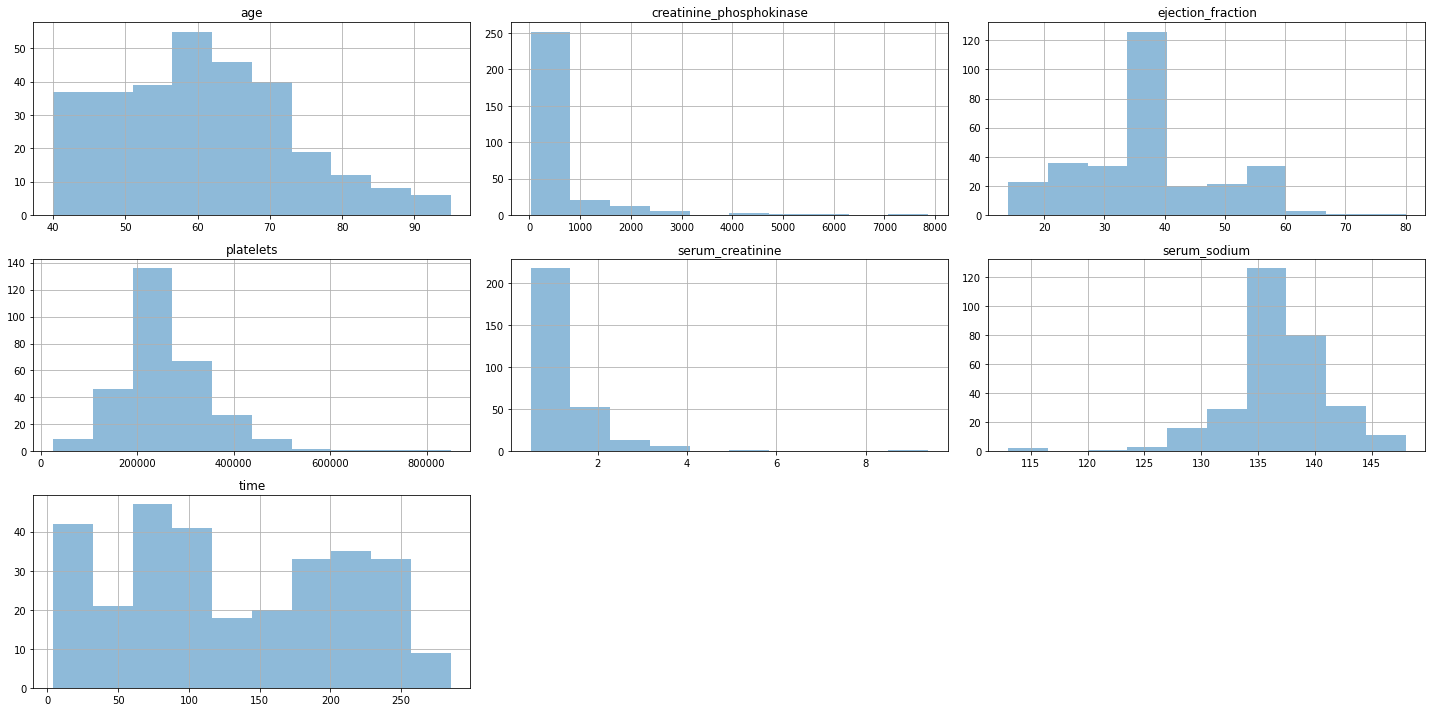

In [23]:
dataset.hist(alpha=0.5, figsize=(20, 10))
plt.tight_layout()

Looking at **age** we see that we are in the group of people of a more adavcned age. This is not surprising since we are working with data of those that have been checked for CHF.

With ***creatinine_phosphokinase*** we can see some very high values, but as discussed before we cannot just dismiss them as measurement errors.

With **ejection_fraction** we can see quite a few observations on the lower end, which again is not surprising since we are looking at a dataset of people who underwent investigations for CHF.

**Platelets** appear to be almost normally distributed and most of the observations within the normal range for this metric, but we do have some very high values which is diagnosed as Extreme thrombocytosis.

With **serum_creatinine** we also see some very high values in the outliers. Such values are not impossible, but anything above indicates severe kideny damage. For us though what is relevant, is that we cannot just dismiss these observations as measurement errors. 

The lower levels of **serum_sodium** aslo cannot be dismissed as measurement erros as levels below 100 are possible.





**Let us look further into the box plots where we split the data to see if the distributions differ for those who have been diagnosed with CHF versus those who have not been diagnosed with CHF.**

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/boxplot.py:391: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds,
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python

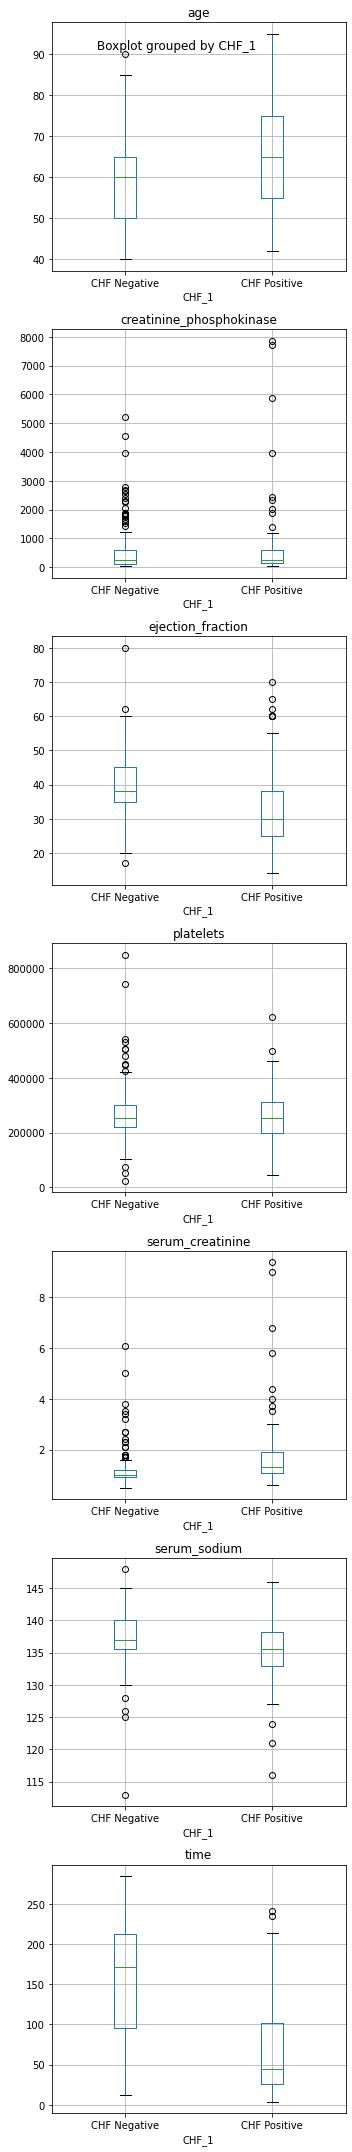

In [24]:
fig, axs = plt.subplots(7, figsize=(5,  30), sharey=False)
dataset.boxplot(['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time'],
                'CHF_1', axs)
plt.tight_layout()

**Age** - we can see that people who have been diagnosed with CHF have are higher in the age distribution, i.e. they are older. Nothing strange here, so let's move on.

The distribution of **creatinine_phosphokinase** does not appear to be very different for those with CHF versus those without CHF. We do see some extreme outliers for those diagnosed with CHF, but we have already checked that these values appear to be valid observations rather than measurement errors.

In case of **ejection_fractio**n we see that those with CHF have lower ejection fraction rates, which is in line with what one would expect. We also see a few outliers for those with CHF diagnosis, something that maybe could be checked if one has some problems in the modeling phase (although they are not numerous, thus the chances that we'll have problems in the modeling stage is low).

The picture we see in platelets is rather interesting. While the positions of the two distributions don't seem to be very different, the distribution for the people diagnosed with CHF is more dispersed (larger interquartile range, longer wiskers). If you remeber that the number of platelets does not have such a clear cut correlation with CHF, all we know is that when values are too high or too low people may have either bleeding or problems with thrombs... but this fits well into our narative because we do see that for those who have CHF the frequency of too many or too few platelents is higher. This is not a very obvious connection to make so if you did it on your own during class pat yourself on the back :) 

**serum_creatinine** - is as expected somewhat higher for those with CHF. There are some observations with very high values, but this was discussed above and we know that these values are valid observations rather than measurement errors.

**serum_sodium** - is as expcted lower for those with CHF (otherwise not huge differences to notice).

**time** - as expected those who have CHF have visited the doctor more recently than those with no such diagnosis.



**To see how variables correlate btween themselves create a scatter plot for each pair of variables**

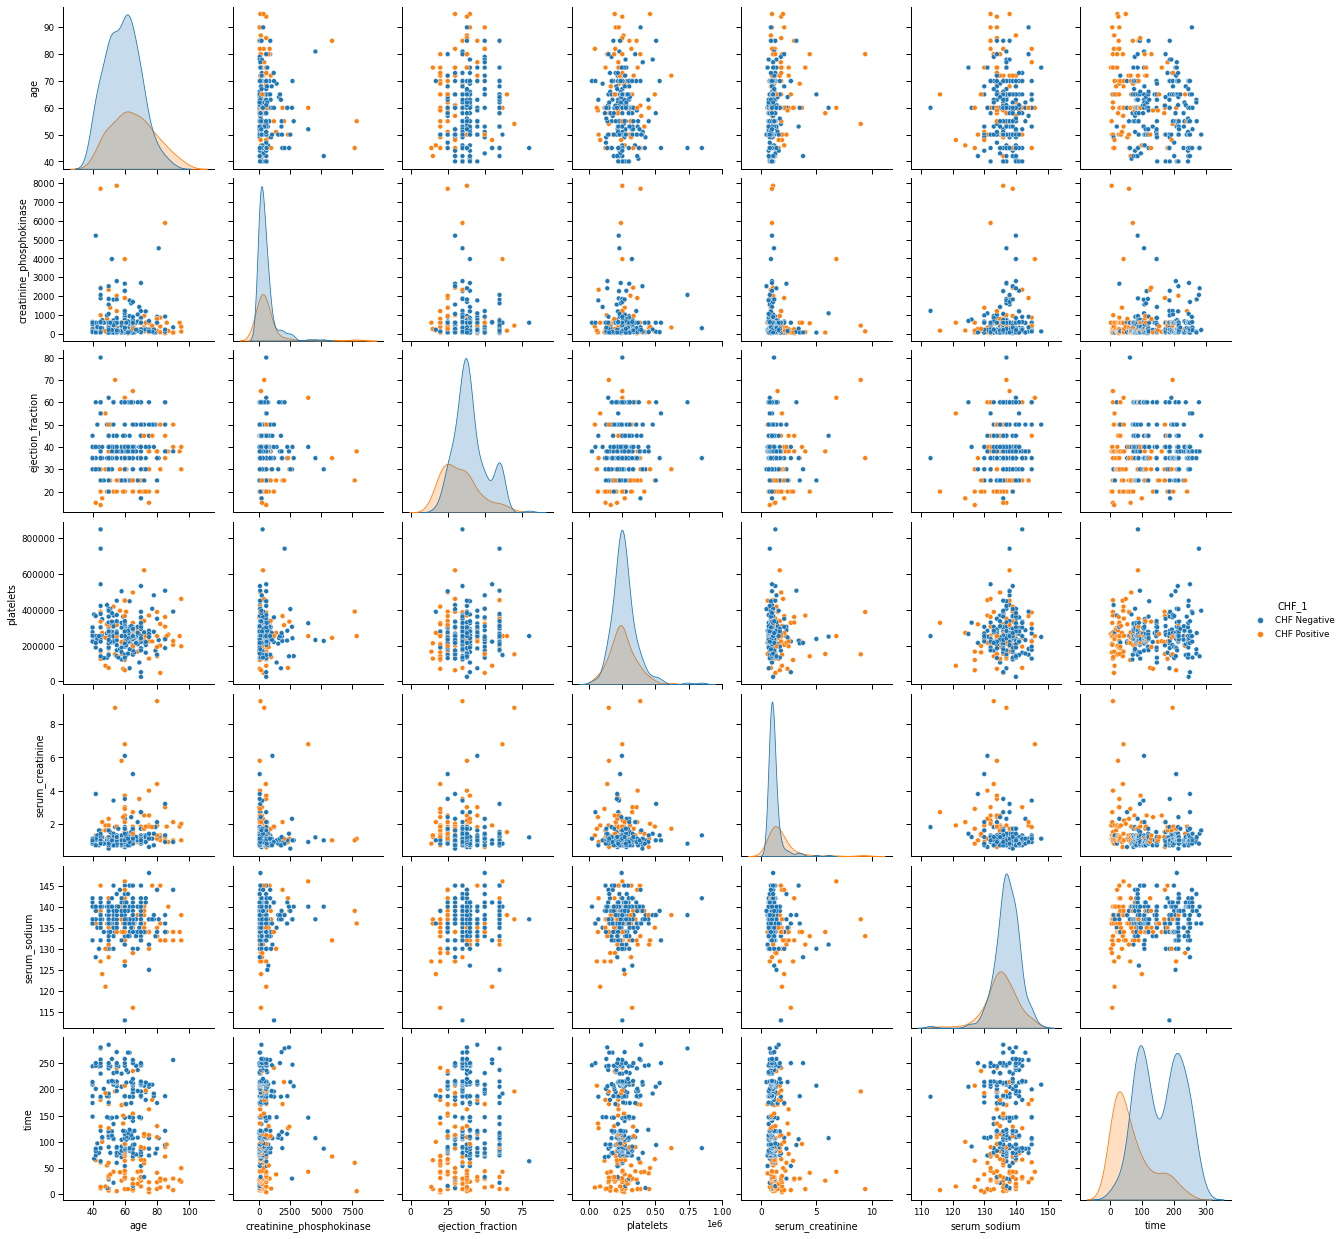

In [25]:
sns.set_context('paper')
sns.pairplot(dataset, hue='CHF_1');

This graph shows how each pair of variables correlate between each other. The direction of the cloud of the dots shows us how two variables correlate. The colors show us the differentiation by CHF diagnosis - the blue dots are for those with no CHF and the orange dots are for those with CHF. 

When you can notice a direction in the cloud of data in any of the plots it means that there is a correlation between the two variables (you can also think of drawing a line in that cloud and ask yourself if that line would be tilted, or vertical or horizontal; if it would be tilted than there could be a correlation).


 There appears to be some positive correlation between **platelets** and **age** (row 4, col 1), which is not unexpected.

 Also **time** and **age** seem to be negatively correlated (row 7 col 1), which means that those older have fewer days since their last visite to the doctor, which falls into the picture that we saw in our box plots, where those who are older had a higher frequency of CHF, and also those with CHF had fewer days since they visited their doctors's office. 

 A cleare picture of these correlations will be given by the heatmap.

 With the color of the dots, think of whether you can separate them with a line. The lowes row for example we could draw a line that would relatively well delimit the orange dots from the blue dots. The variable on the Y axis is **time** in the last row so what we can tell from these plots in the last row is that thos diagnosed with CHF have been to the doctor more recently (not new conclusions, but always good to confirm!). This same segregation is also obvious in the last column (also time, but now on the X-axis).

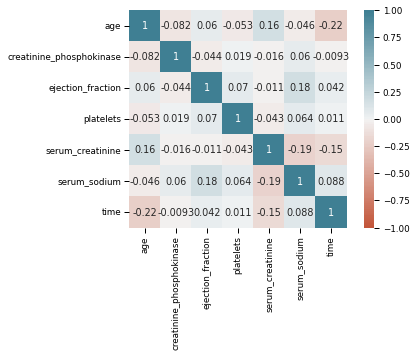

In [27]:
corr = dataset.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200),
             square=True, annot=True)

The heatmap should be read with the healp of the color map on the right, but we also have already the correlation coefficients on the map, so that's even handier. 

At the very first glance notice how very light the whole heatmap is. This is an indicator that the correlations are not strong (see the color on the right, the closer the correlation is to 1 or to -1 the more intense is the color). Some slight correlations are between **time** and **age**, only -0.22 (something we alread noticed) and **serum_creatinine** and **serum_sodium**, something that was probably less obvious in the pair plots, which is not surprising since the correlation coefficient is rather low -0.19.